# Use this program to create my database of handwriten number

## load all packages

In [1]:
# from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
#import PIL

import h5py

import pandas as pd

print("tf ver:\t\t", tf.__version__)
print("keras ver:\t", keras.__version__)
print("np ver:\t\t", np.__version__)
# print("PIL ver:\t", PIL.__version__)
print("pil ver:\t", Image.__version__)
print("pandas ver:\t", pd.__version__)


2022-04-05 17:58:28.688615: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 17:58:28.688636: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


tf ver:		 2.7.0
keras ver:	 2.7.0
np ver:		 1.17.4
pil ver:	 7.0.0
pandas ver:	 0.25.3


# Can we read images?

## Individual image

In [2]:
imgs = []

In [7]:
three = np.invert(Image.open('Numbers/three-0.png').convert('L').resize((28,28)))
imgs = np.expand_dims(three, 0)

In [8]:
imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  36,  74,
         82,  75,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 103, 160, 204, 238,
        244, 240, 206,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 146, 230, 255, 255, 245,
        253, 253, 255, 227,  59,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   9, 160, 242, 229, 191, 148,  93,
         56,  61, 186, 255, 188,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 233, 244, 116,  33,   1,   0,
          0,   0,  59, 222, 255,  93,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

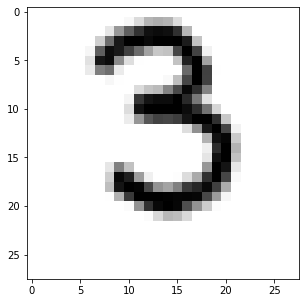

In [9]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.subplot(1,1,1)
# plt.xticks([])
#     plt.yticks([])
plt.grid(False)
plt.imshow(imgs[0], cmap=plt.cm.binary)
#     plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
plt.show()

---

## Read all images and labels from a list in a file

In [13]:
df = pd.read_csv('Numbers/Labels.csv')

In [14]:
imgs = []
labels = []

In [15]:
len(imgs)

0

In [16]:
for file in df['file']:
    print(file)
    in_img = np.invert(Image.open('Numbers/' + file).convert('L').resize((28,28)))
    print(in_img)
    in_img.shape
    if len(imgs) == 0:
        imgs = np.expand_dims(in_img, 0)
    else:
        in_img = np.expand_dims(in_img, 0)
        imgs = np.append(imgs, in_img, axis = 0)

one-0.png
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 163  68   2   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10  72 178 255 202   5   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20 101 188 247 255 190   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  20 142 226 236 218 255 162   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 108 237 236 127 166 255 150   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 150 255 162  25 126 255 149   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3  94 176  77   0 127 255 150   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9  10   0 129 

## Set up Single Labels

Do not run anymore

In [17]:
# labels = np.array([3])

In [18]:
print(labels)

[]


In [19]:
type(labels)

list

## Lables from dataframe

In [20]:
labels = df['label'].to_numpy()

## Save data to disk

In [21]:
print(labels)

[1 2 3 4 5 6 7 8 9 0]


In [ ]:
np.savez('mynumber.npz', images=imgs, labels=labels)